In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Text(0.15, 0.8, 'chisq: 512174.18')

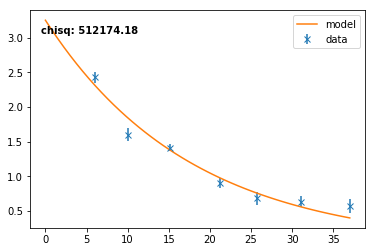

In [47]:
x = np.array([6, 10, 15.2, 21.2, 25.7, 31.12, 36.97])
I = np.array([2.43, 1.60, 1.41, 0.905, 0.68, 0.63, 0.57])
I_bg = I - 0.484
lnI = np.log(I)

sigma = ([.08, .09, .05, .07, .1, .08, .1])
 






def model(x, I_0, mu):
    return I_0*np.exp(-mu*x)

init_guess = [1, 1]
fit = scipy.optimize.curve_fit(model, x, I, sigma = sigma, p0=init_guess, absolute_sigma=True)
ans, cov = fit
fit_I0, fit_mu = ans

plt.errorbar(x, I, sigma, fmt='x', label = "data")

t = np.linspace(0,37)
plt.plot(t, model(t, fit_I0, fit_mu), label ='model')
plt.legend()

chisq = np.sum(((x - model(x, fit_I0, fit_mu))/sigma)**2)
plt.figtext(0.15, 0.8, "chisq: %.2f"%chisq,fontweight='bold')